<a href="https://colab.research.google.com/github/thekripaverse/Machine_Learning_Algorithms/blob/main/Restaurant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Handles

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
d1=pd.read_csv('/content/drive/MyDrive/AI_DS/i1.csv')
d2=pd.read_csv('/content/drive/MyDrive/AI_DS/i2.csv')

In [ ]:
data=d1.merge(d2,how='outer')

In [ ]:
data.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,01-04-2023,01-04-2023 13:16,23465,Babycorn Manchurian,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,Veg Starters,NaN
1,01-04-2023,01-04-2023 13:16,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN
2,01-04-2023,01-04-2023 13:16,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.0,315.0,20.0,biller,0,NaN,Veg Gravy,NaN
3,01-04-2023,01-04-2023 13:16,23465,Pulka (2 No),40.0,3.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,Indian Breads,NaN
4,01-04-2023,01-04-2023 13:16,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN


In [ ]:
data.shape

(15621, 16)

In [ ]:
data.describe()

,Invoice No.,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Covers,HSN
count,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15613.000000,15621.0,0.0
mean,25989.963127,116.608988,1.338839,147.407080,1.262818,7.303668,153.447930,18.068340,0.0,NaN
std,1433.192998,63.663769,0.949814,210.127442,6.656396,10.461474,219.678163,17.191377,0.0,NaN
min,23465.000000,12.000000,1.000000,12.000000,0.000000,0.000000,12.600000,1.000000,0.0,NaN
25%,24751.000000,50.000000,1.000000,80.000000,0.000000,4.000000,84.000000,4.000000,0.0,NaN
50%,25980.000000,140.000000,1.000000,150.000000,0.000000,7.000000,147.000000,12.000000,0.0,NaN
75%,27274.000000,160.000000,1.000000,170.000000,0.000000,8.500000,178.500000,26.000000,0.0,NaN
max,28389.000000,770.000000,28.000000,21560.000000,288.000000,1078.000000,22638.000000,50.000000,0.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB


In [ ]:
data.isna().sum()

,0
Date,0
Timestamp,0
Invoice No.,0
Item Name,0
Price,0
Qty.,0
Sub Total,0
Discount,0
Tax,0
Final Total,0


In [ ]:
data["Invoice No."].unique()

array([23465, 23466, 23467, ..., 25323, 25324, 25325])

In [ ]:
unique=data["Invoice No."].nunique()
unique

4925

In [ ]:
total=data["Final Total"].sum()

In [ ]:
total/unique
#average purchase value

np.float64(486.70256243654825)

In [ ]:
data.groupby(data['Invoice No.'])['Final Total'].sum().loc[28327] #total of particular invoice


np.float64(1081.5)

In [ ]:
qty=data.groupby("Item Name")["Qty."].sum().sort_values(ascending=False) #top 5 items purchase
qty

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0
Romali Roti (1 No),822.0
Lemon Soda,722.0
...,...
Chicken Malai Kebab,1.0
Soft Drinks Tin,1.0
Veg Pulav,1.0


<Axes: xlabel='Item Name'>

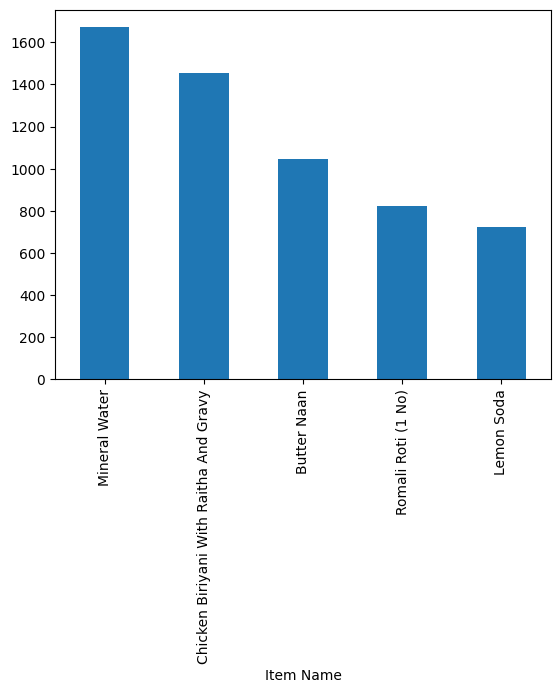

In [ ]:
import matplotlib.pyplot as plt
qty.head(5).plot(kind='bar')

In [ ]:
data[data['Date']=="2023-09-14"].groupby(data['Invoice No.'])['Final Total'].sum().sort_values(ascending = False).head(1)

,Final Total
Invoice No.,
28215,1492.2


In [ ]:
unique=data["Invoice No."].nunique()
total=data["Final Total"].sum()
df=data.groupby(data['Invoice No.'])['Final Total'].sum()>total/unique
df[df==True].count()

np.int64(1458)